#IMPORT LIBRARIES

In [1]:
#import all necessary libraries for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#QUESTION 1 (LOAD DATA)

In [2]:
#read dataset in
housing= pd.read_csv('Housing_more.csv')
housing

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#QUESTION 2
EXPLORE THE DATA

In [3]:
#check top 4 rows
housing.head(4)

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished


In [4]:
#checking datatypes of each column
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   size              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#how many rows and columns are there
housing.shape

(545, 13)

In [6]:
#check statistical data for numeric columns
housing.describe()

,price,size,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
#check for null values
housing.isnull().sum()

price               0
size                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
#check for duplicate values
housing.duplicated().sum()

0

#QUESTION 3
DATA PREPROCESSING

In [9]:
#NO MISSING VALUES TO BE IMPUTED OR CLEANED

<Axes: ylabel='price'>

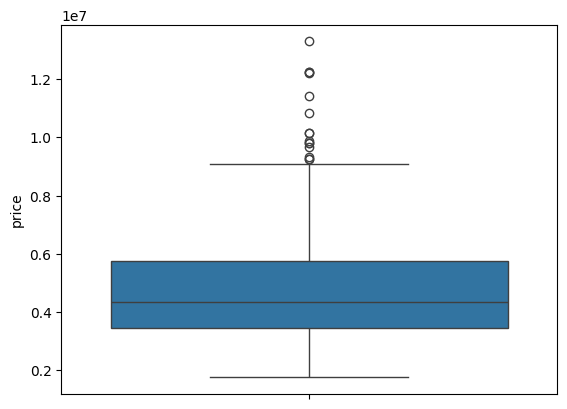

In [10]:
#Checking for outliers in numeric columns using boxplot

#Boxplot of Price
sns.boxplot(housing['price'])

Dealing with outliers found in price column USING IQR

In [11]:
#STEP 1- FINDING IQR
q1= housing['price'].quantile(0.25)
q3= housing ['price'].quantile(0.75)
iqr= q3-q1
iqr

2310000.0

In [12]:
#STEP 2 - Defining upper and lower thresholds
lowerthresh= q1-1.5*iqr
upperthresh= q3+1.5*iqr
print(lowerthresh)
print(upperthresh)

-35000.0
9205000.0


In [18]:
#STEP3 - Capping outliers
housing['price'] = np.where(housing['price'] < lowerthresh, lowerthresh, housing['price'])
housing['price'] = np.where(housing['price'] > upperthresh, upperthresh, housing['price'])

<Axes: ylabel='price'>

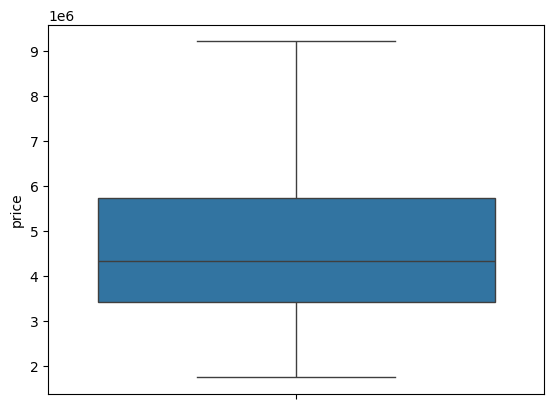

In [19]:
sns.boxplot(housing['price'])

In [20]:
housing

,price,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,9205000.0,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9205000.0,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,9205000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,9205000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150.0,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000.0,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000.0,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: ylabel='size'>

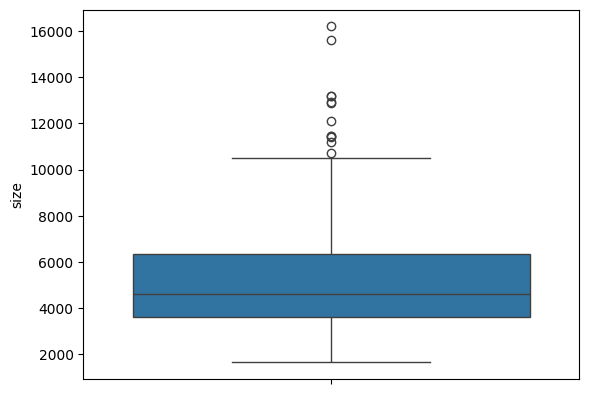

In [21]:
sns.boxplot(housing['size'])

In [22]:
#STEP 1- FINDING IQR
Q1= housing['size'].quantile(0.25)
Q3= housing ['size'].quantile(0.75)
IQR= Q3-Q1
IQR

2760.0

In [23]:
#STEP 2 - Defining upper and lower thresholds
lowthresh= Q1-1.5*IQR
upthresh= Q3+1.5*IQR
print(lowerthresh)
print(upperthresh)

-35000.0
9205000.0


In [58]:
#STEP3- Capping outliers
housing['size'] = np.where(housing['size'] < lowthresh, lowthresh, housing['size'])
housing['size'] = np.where(housing['size'] > upthresh, upthresh, housing['size'])

<Axes: ylabel='size'>

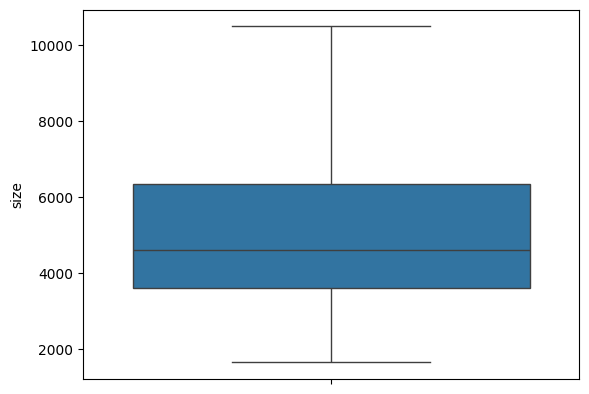

In [25]:
sns.boxplot(housing['size'])

#ENCODING LABELS

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
print(label)

LabelEncoder()


In [27]:
#Encoding all categorical variables
columns_to_encode=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for column in columns_to_encode:
  housing[column]=label.fit_transform(housing[column])

#QUESTION 4
FEATURE SELECTION

Choosing the most relevant features that contribute to predicting the house prices and visualizing them

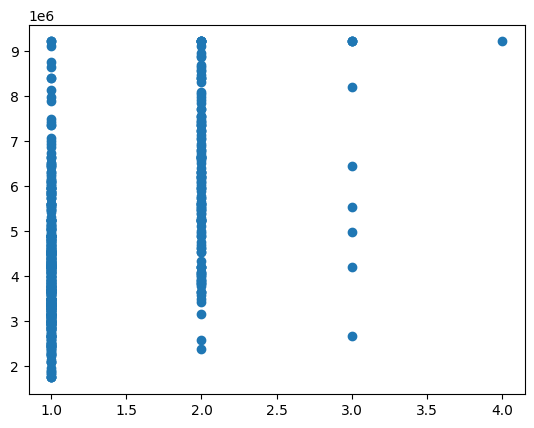

In [35]:
#Data Visuals
plt.scatter(housing['bathrooms'], housing['price'])
plt.show()

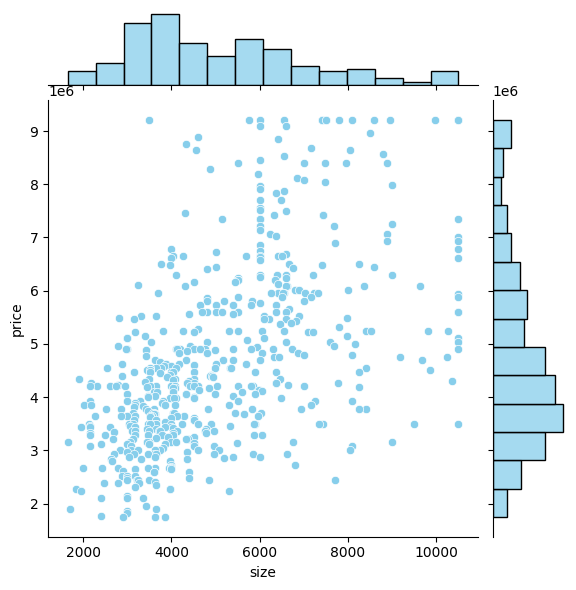

In [29]:
#Visualizing using Jointplot
sns.jointplot(x=housing['size'], y=housing['price'], kind='scatter', color='skyblue')
plt.show()

In [31]:
import warnings
warnings.filterwarnings('ignore')

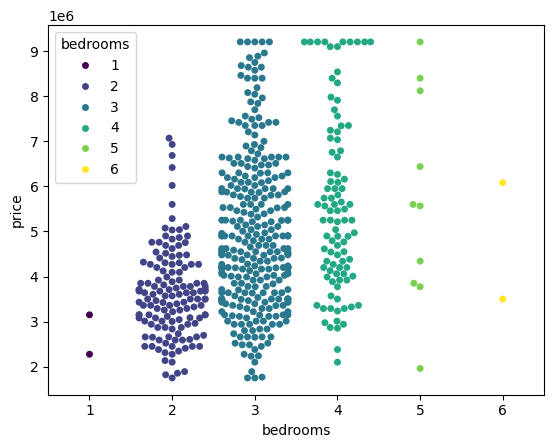

In [32]:
#Visualizing using Swarmplot
sns.swarmplot(x=housing['bedrooms'], y=housing['price'], data=housing, hue='bedrooms', palette='viridis')
plt.show()

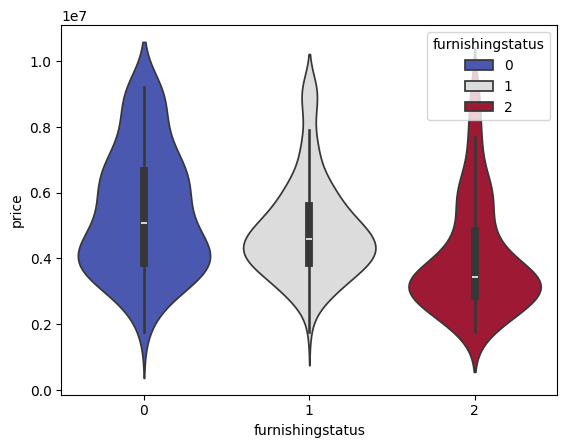

In [33]:
sns.violinplot(x='furnishingstatus', y='price', data=housing, hue='furnishingstatus', palette='coolwarm')
plt.show()

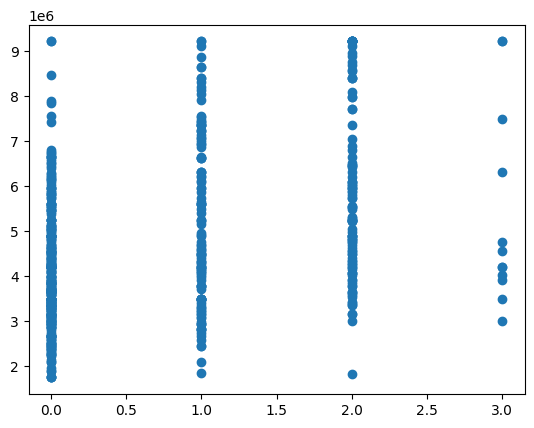

In [37]:
plt.scatter(housing['parking'], housing['price'])
plt.show()

#QUESTION 5- MODEL TRAINING

#Splitting my Data into x and y
We split the dataset into two parts: independent variable (features)(size) x and dependent variable (target) (price) y.

x contains the independent variables, which are the columns (size, airconditioning, bedrooms and furnishingstatus). y contains the dependent variable, which is the column 'price' (selling price of the house).

In [38]:
#Split data into features x and y
x=housing.drop('price', axis=1)
y=housing['price']

In [39]:
x.head()

,size,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420.0,4,2,3,1,0,0,0,1,2,1,0
1,8960.0,4,4,4,1,0,0,0,1,3,0,0
2,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,7500.0,4,2,2,1,0,1,0,1,3,1,0
4,7420.0,4,1,2,1,1,1,0,1,2,0,0


In [40]:
y.head()

0    9205000.0
1    9205000.0
2    9205000.0
3    9205000.0
4    9205000.0
Name: price, dtype: float64

In [41]:
#Train linreg Model
linreg= LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [42]:
linreg.coef_

array([ 2.52228656e+02,  1.23361683e+05,  8.66078372e+05,  4.34953726e+05,
        4.45505355e+05,  3.31130729e+05,  3.41464775e+05,  9.29557975e+05,
        8.19367730e+05,  2.20579334e+05,  5.67677176e+05, -1.99626964e+05])

In [43]:
linreg.intercept_

240210.03565904964

In [44]:
#Predicting prices for original values initially assigned to y_pred
y_pred= linreg.predict(x)
y_pred[:8]

array([ 7915920.24316294, 10124365.00036407,  7320735.70191981,
        8063188.91911063,  6719806.4736299 ,  7950745.58521712,
        9309910.6180151 ,  7019813.3321122 ])

In [45]:
#Original values assigned to y_pred
y[:8]

0    9205000.0
1    9205000.0
2    9205000.0
3    9205000.0
4    9205000.0
5    9205000.0
6    9205000.0
7    9205000.0
Name: price, dtype: float64

Visualise the Regression line using scatterplot

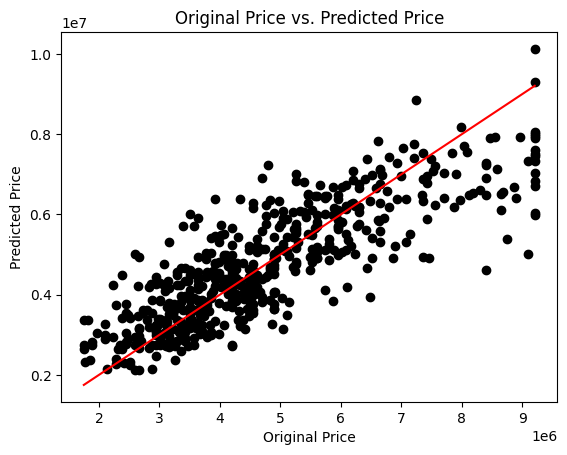

In [47]:
# Plot original data points
plt.scatter(y, y_pred, color='black')

# Plot the line of best fit
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-')
#(where y.min will return minimum value of y and y.max will return maximum value of y)

# Add labels and title
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs. Predicted Price')

# Show plot
plt.show()

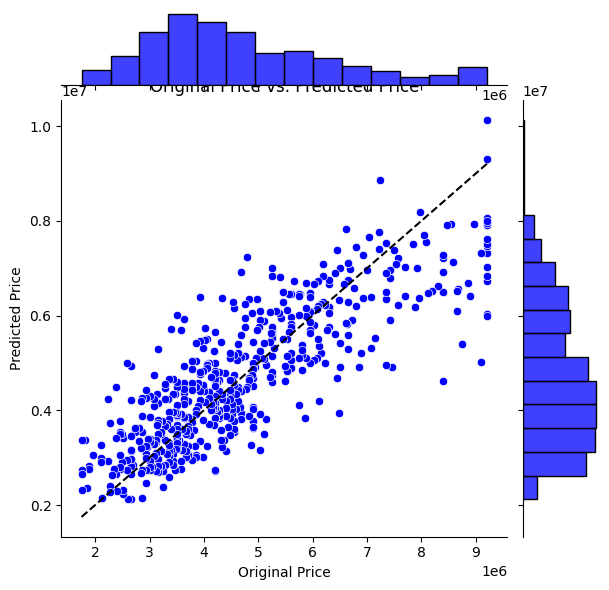

In [52]:
#visualising regression line using jointplot
sns.jointplot(x= y, y= y_pred, kind='scatter', color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
# Add labels and title
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.title('Original Price vs. Predicted Price')

# Show plot
plt.show()

#QUESTION 6: MODEL EVALUATION

In [53]:
#Using the R-squared (R²) score
from sklearn.metrics import r2_score
r2= r2_score(y,y_pred)
r2

0.690545377207932

In [55]:
#Trying the alternative method
linreg.score(x, y)

0.690545377207932

In [57]:
#Using Mean Squared Error
mse= mean_squared_error(y, y_pred)
mse

940813077772.8135

#DOCUMENTATION

#Housing Data Set Overview
The housing_more data set is a survey of house prices in a specific area, along with various factors and facilities that may affect these prices. To understand the structure and contents of the data set, I performed several initial exploratory steps:

#Previewing the Data:
1) I used the head() function to view the top four rows of the data set, providing a snapshot of the data.

2) Data Types and Structure:
I utilized the info() function to display the data types of each column and check for any missing values. This function also provided information on the number of non-null entries in each column.

3) Data Dimensions:
The shape attribute was used to determine the dimensions of the data set, revealing that it contains 545 rows and 13 columns.

4) Descriptive Statistics:
The describe() function was applied to obtain summary statistics for all numeric columns. This included the mean, standard deviation, minimum and maximum values, as well as percentile values (25th, 50th, and 75th percentiles).

#Key observations from the data include:

##House Prices:
The maximum house price in the area is 13,300,000.
The minimum house price is 1,750,000.
##Bedrooms and Bathrooms:
The number of bedrooms in the houses ranges from 1 to 6.
The number of bathrooms varies, with a minimum of 1 bathroom.
##Furnishings
Houses are graded based on
i. UnFurnished
ii. Semi Furnished
iii. Furnished

And a lot of other factors like parking, airconditioning and mainroads etc.

#Data Set Characteristics
The data set comprises 545 rows and 13 columns, featuring two distinct data types: integers and objects. While it is a relatively clean data set, there are notable outliers in the size and price columns.

#Handling Outliers
To address the outliers in the size and price columns, a capping method was applied. This method involved setting a threshold to limit extreme values and reduce their impact on the analysis.

#Capping Method:
Step1: Determine Percentiles

Step2: Setting thresholds

Step3: Impute outlier values with threshold values



#Model Performance Metrics
MY model has an R² value of 0.6905, meaning that the model accounts for 69.05% of the variability in the outcome variable.
In other words, 69.05% of the changes in the dependent variable (Price) can be predicted based on the changes in the independent variables used in the model.

#Insights
Insights
From the exploratory data analysis and the capping of outliers, several insights can be drawn:

#House Prices:

The significant range in house prices (from 1,750,000 to 13,300,000) indicates a diverse housing market with varying property values. This wide range could be due to differences in preferred area(prefarea), size, and other amenities.

#Bedroom and Bathroom Distribution:
Houses in the dataset vary from 1 to 6 bedrooms and have at least 1 bathroom. This range suggests that the dataset includes a mix of small and large properties, catering to different family sizes and preferences.

#Impact of Outliers:
The presence of outliers in the size and price columns highlights the variability in the dataset. By capping these outliers, the analysis becomes more robust, reducing the skewness caused by extreme values and providing a clearer understanding of typical house prices and sizes.

#Data Cleanliness:
With only two data types (integers and strings) and no significant missing values, the dataset is relatively clean, which simplifies the preprocessing steps and ensures more reliable results from the modeling process.

#Factors Influencing Prices:
The dataset includes several factors that likely influence house prices, such as the number of bedrooms and bathrooms. Further analysis and modeling can help quantify the impact of these factors and identify other significant predictors of house prices.